# Reconocimiento de dígitos manuscritos con Keras

## Importación de la librería

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from tensorflow.keras import optimizers


## Descarga de la base de datos MNIST

La base de datos MNIST dispone de un dataset de imágenes de dígitos manuscritos que podemos utilizar para entrenar nuestra red. Esta base de datos se encuentra como módulo dentro de la propia librería Keras. A continuación mostramos como obtener el _dataset_, que se divide en un conjunto de entrenamiento (_train_) y de validación (_test_). Para cada uno de estos conjuntos, tenemos las entradas `X` y las salidas esperadas `y`.

In [ ]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Dimensiones del conjunto X_train", X_train.shape)
print("Dimensiones del conjunto y_train", y_train.shape)

print("Dimensiones del conjunto X_train", X_test.shape)
print("Dimensiones del conjunto y_train", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Dimensiones del conjunto X_train (60000, 28, 28)
Dimensiones del conjunto y_train (60000,)
Dimensiones del conjunto X_train (10000, 28, 28)
Dimensiones del conjunto y_train (10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

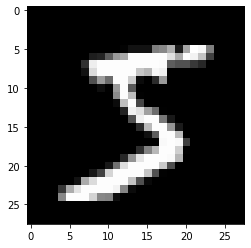

In [ ]:
print (X_train[0])
plt.imshow(X_train[0], cmap='gray', interpolation='none')
print (y_train[0])

Vemos que se dispone de $60000$ ejemplos para el entrenamiento, y de $10000$ ejemplos de validación. Cada imagen de entrada tiene $28 \times 28$ píxeles, y las salidas esperadas se representan como enteros de $0$ a $9$. A continuación mostramos de forma gráfica los primeros $9$ ejemplos del conjunto de entranemiento:

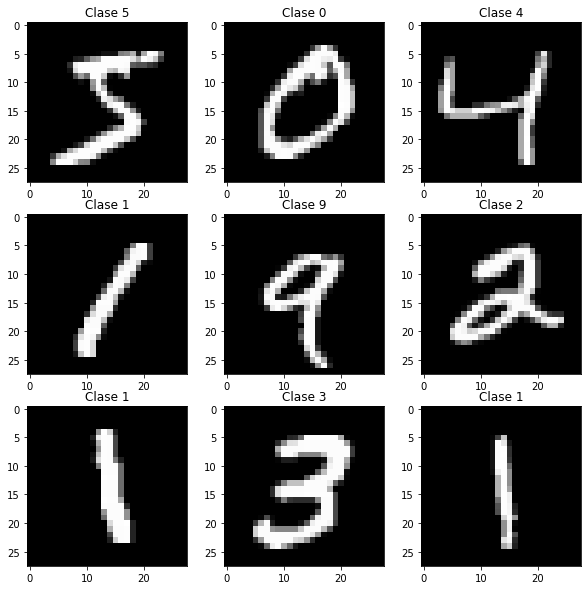

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) 

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Clase {}".format(y_train[i]))

## Procesamiento de la base de datos de entrada

Reestructuramos los datos, para que en lugar de tener los píxeles dispuestos en una matriz de $28 \times 28$ se dispongan en una tupla de 784 componentes ($28 \times 28 = 768$) de tipo `float` de 32-bits. Además, el valor de intensidad de los píxeles se convierte del rango $[0, 255]$ a $[0, 1]$.

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Dimensiones de la matriz de entrenamiento: {}".format(X_train.shape))
print("Dimensiones de la matriz de validacion: {}".format(X_test.shape))

Dimensiones de la matriz de entrenamiento: (60000, 784)
Dimensiones de la matriz de validacion: (10000, 784)


Las salidas esperadas se convierten a formato categórico. En lugar de tener un único entero, se representarán como una tupla de 10 elementos, donde únicamente será $1$ el elemento que corresponda al dígito del que se trate el correspondiente ejemplo de entrada.

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

for i in range(9):
  print("Salida esperada del ejemplo {}: {} ({})".format(i, Y_train[i], y_train[i]))


Salida esperada del ejemplo 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] (5)
Salida esperada del ejemplo 1: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (0)
Salida esperada del ejemplo 2: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] (4)
Salida esperada del ejemplo 3: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] (1)
Salida esperada del ejemplo 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] (9)
Salida esperada del ejemplo 5: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] (2)
Salida esperada del ejemplo 6: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] (1)
Salida esperada del ejemplo 7: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] (3)
Salida esperada del ejemplo 8: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] (1)


## Creación del modelo de la red

Vamos a crear con Keras una red en la que tendremos 3 capas:

* Entrada: $784$ neuronas correspondientes a los valores de cada píxel de la imagen de entrada
* Oculta: Vamos a crear una única capa oculta con $30$ neuronas.
* Salida: Tendremos $10$ neuronas, cada una de ellas correspondiente a un dígito de 0 a 9

Todas las neuronas utilizarán como función de activación la sigmoidea, la función de coste será el error cuadrático medio (`mean_squared_error`) y como método de optimización utilizaremos descenso por gradiente estocástico (`SGD`) con una tasa de aprendizaje (`lr`) de $10$.

In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('sigmoid'))  
#model.add(Dense(20))
#model.add(Activation('sigmoid'))                   
model.add(Dense(10))
model.add(Activation('sigmoid'))

# Probar lr=1.0, lr=10.0 y lr=100.0
sgd = optimizers.SGD(lr=1.0)
# Probar loss='mean_squared_error' y loss='categorical_crossentropy'
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Podemos observar que la red que hemos creado tiene $23860$ parámetros (pesos y biases) que debemos entrenar. 

## Entrenamiento de la red

Vamos a lanzar el entrenamiento de la red, dividiendo el conjunto de entrada en _mini-batches_ de $100$ elementos. Entrenaremos durante $20$ épocas (en cada una de ellas se le pasarán a la red todos los ejemplos de entrenamiento). Durante el entrenamiento, activamos el modo `verbose` para observar la evolución tanto del coste (`loss`) como de la precisión de la clasificación (`acc`). 

In [ ]:
model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9226 - val_loss: 0.0130 - val_accuracy: 0.9285
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0134 - accuracy: 0.9240 - val_loss: 0.0129 - val_accuracy: 0.9287
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9252 - val_loss: 0.0127 - val_accuracy: 0.9297
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9258 - val_loss: 0.0126 - val_accuracy: 0.9299
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9268 - val_loss: 0.0124 - val_accuracy: 0.9307
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9276 - val_loss: 0.0123 - val_accuracy: 0.9313
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9287 - val_loss: 0.0121 - val_accuracy: 0.9319
Epoch 

## Evaluación de la red

Podemos evaluar el modelo ya entrenado. A continuación se muesta el coste (error cuadrático medio) y precision (fracción de ejemplos bien clasificados) del modelo obtenido:

In [ ]:
score = model.evaluate(X_test, Y_test,
                       verbose=1)
print('Coste (MSE):', score[0])
print('Precision:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9386
Coste (MSE): 0.010850549675524235
Precision: 0.9386000037193298


## Obtención de la predicción

Podemos utilizar el modelo aprendido para obtener la predicción para nuevos ejemplos de entrada.

Salida esperada: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] (7)
Salida de la red:  [[9.5030665e-03 1.3917685e-04 1.1788785e-02 2.5775015e-02 4.4536591e-04
  1.5947223e-04 1.2026033e-05 9.7340262e-01 1.0907054e-03 4.2934716e-03]]
Prediccion:  [[9.5030665e-03 1.3917685e-04 1.1788785e-02 2.5775015e-02 4.4536591e-04
  1.5947223e-04 1.2026033e-05 9.7340262e-01 1.0907054e-03 4.2934716e-03]]


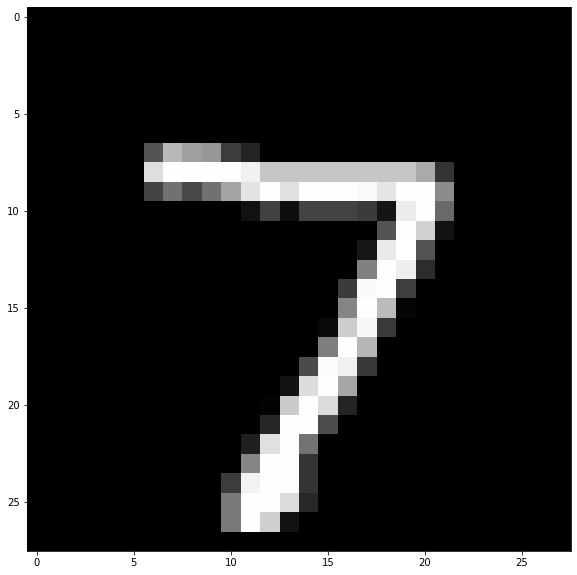

In [ ]:
indice = 0

X = X_test[indice].reshape(1,784)
Y = Y_test[indice]
y = y_test[indice]

plt.figure()
plt.imshow(X_test[indice].reshape(28,28), cmap='gray', interpolation='none')

print("Salida esperada: {} ({})".format(Y,y))

salida = model.predict(X)
clase = model.predict(X)

print("Salida de la red: ", salida)
print("Prediccion: ", clase)

## Visualización de los pesos

Podemos visualizar los pesos de la primera capa accediendo al ellos. Estos pesos pasan a ser la codificación aprendida por la red


[array([[-0.05643204, -0.04361376, -0.06404559, ...,  0.08403394,
         0.02447372,  0.05976101],
       [-0.00085988, -0.06611266, -0.03974793, ...,  0.00812548,
        -0.03168131, -0.04832496],
       [-0.08216026,  0.02349561, -0.00027271, ...,  0.08139516,
         0.01188555,  0.01599371],
       ...,
       [ 0.01733838, -0.04023198,  0.02894622, ...,  0.03443722,
         0.05159969, -0.08260701],
       [ 0.01600193,  0.00027058, -0.03794059, ...,  0.02583659,
         0.00542447, -0.0078778 ],
       [ 0.06396087, -0.05421536, -0.08267771, ..., -0.05872422,
         0.07531352, -0.0616797 ]], dtype=float32), array([ 0.27357784,  0.01173841,  0.23900618,  0.13001   , -0.16267419,
       -0.02038769,  0.17548394, -0.2442061 , -0.36473247, -0.17458577,
       -0.21555914, -0.39362052,  0.03884382, -0.4231548 , -0.07222811,
        0.4773016 , -0.17763026,  0.03027125, -0.1486889 ,  0.11040815,
       -0.197066  , -0.01355834,  0.13720784, -0.12043113, -0.1041549 ,
        0.

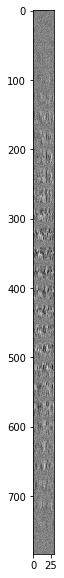

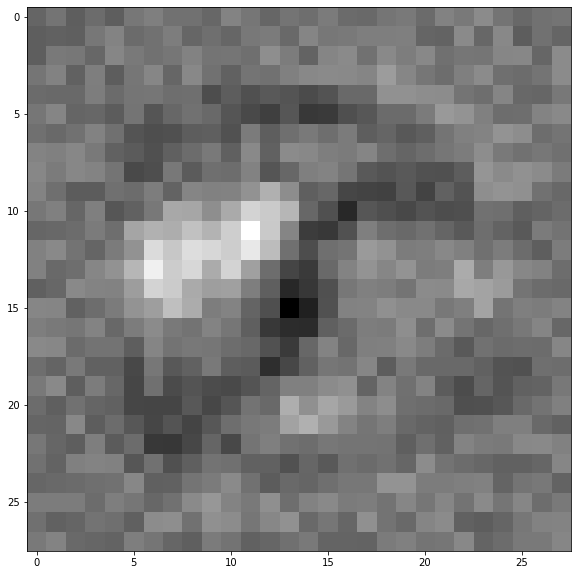

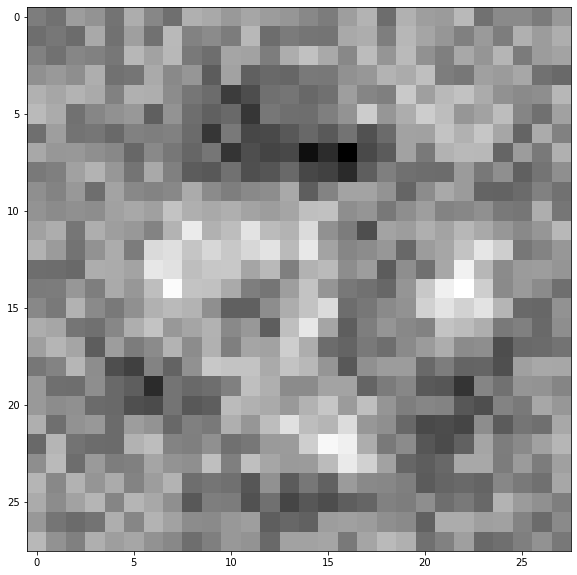

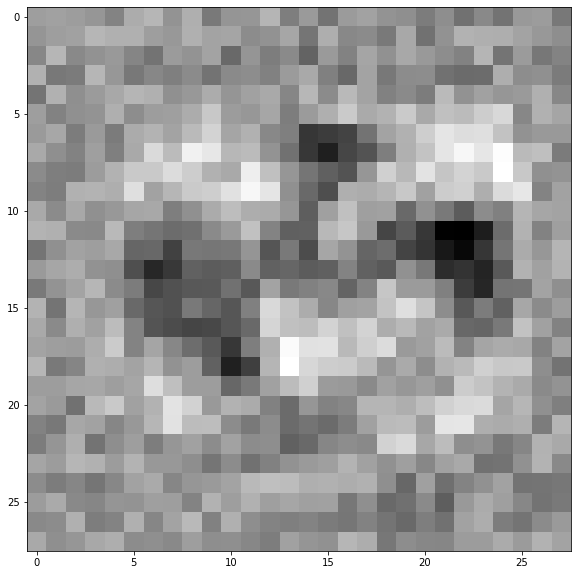

In [ ]:
pesos = model.layers[0].get_weights()
print(pesos)
plt.figure()
W1 = pesos[0] 
print(W1.shape)
plt.imshow(W1.reshape(784,30), cmap='gray', interpolation='none')
W2 = pesos[1] 
print(W2.shape)
print(W2)
# Imprimir los pesos de cada unidad (features)
plt.figure()
plt.imshow(W1[:,0].reshape(28,28), cmap='gray', interpolation='none')
plt.figure()
plt.imshow(W1[:,1].reshape(28,28), cmap='gray', interpolation='none')
plt.figure()
plt.imshow(W1[:,25].reshape(28,28), cmap='gray', interpolation='none')
